In [1]:
import intake
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy
import dask

In [9]:
catalog = intake.open_catalog('nwa_catalog.yml')
entries = list(catalog)
entries

['thetao', 'tos']

In [10]:
ds = catalog['thetao'].to_dask()
ds

/home/users/rhs/miniforge-pypy3/envs/xp/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 44GB
Dimensions:     (time: 324, nv: 2, z_l: 52, yh: 845, xh: 775, z_i: 53)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) datetime64[ns] 3kB 1993-01-16T12:00:00 ... 2019-12-16T...
  * xh          (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh          (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
  * z_i         (z_i) float64 424B 0.0 5.0 10.0 15.0 ... 5.5e+03 6e+03 6.5e+03
  * z_l         (z_l) float64 416B 2.5 7.5 12.5 ... 5.25e+03 5.75e+03 6.25e+03
Data variables:
    average_DT  (time) timedelta64[ns] 3kB dask.array<chunksize=(324,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] 3kB dask.array<chunksize=(324,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] 3kB dask.array<chunksize=(324,), meta=np.ndarray>
    thetao      (time, z_l, yh, xh) float32 44GB dask.array<chunksize=(1, 52, 845, 775), meta=np.ndarray>
    time_bnds   (time, nv) datetime64[ns] 5kB dask.array<chunksize=(324, 2), meta=np.ndarray>
Attributes:
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    NumFilesInSet:       1
    associated_files:    areacello: 19930101.ocean_static.nc
    external_variables:  volcello areacello
    grid_tile:           N/A
    grid_type:           regular
    history:             Fri May 12 08:45:23 2023: ncks -4 -L 3 ocean_monthly...
    title:               NWA12_COBALT_2023_04_kpo4-coastatten-physics

In [11]:
ds = ds.assign_coords(latitude=ds.yh, longitude=ds.xh)
ds

<xarray.Dataset> Size: 44GB
Dimensions:     (time: 324, nv: 2, z_l: 52, yh: 845, xh: 775, z_i: 53)
Coordinates:
  * nv          (nv) float64 16B 1.0 2.0
  * time        (time) datetime64[ns] 3kB 1993-01-16T12:00:00 ... 2019-12-16T...
  * xh          (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh          (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
  * z_i         (z_i) float64 424B 0.0 5.0 10.0 15.0 ... 5.5e+03 6e+03 6.5e+03
  * z_l         (z_l) float64 416B 2.5 7.5 12.5 ... 5.25e+03 5.75e+03 6.25e+03
    latitude    (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    longitude   (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
Data variables:
    average_DT  (time) timedelta64[ns] 3kB dask.array<chunksize=(324,), meta=np.ndarray>
    average_T1  (time) datetime64[ns] 3kB dask.array<chunksize=(324,), meta=np.ndarray>
    average_T2  (time) datetime64[ns] 3kB dask.array<chunksize=(324,), meta=np.ndarray>
    thetao      (time, z_l, yh, xh) float32 44GB dask.array<chunksize=(1, 52, 845, 775), meta=np.ndarray>
    time_bnds   (time, nv) datetime64[ns] 5kB dask.array<chunksize=(324, 2), meta=np.ndarray>
Attributes:
    NCO:                 netCDF Operators version 5.0.1 (Homepage = http://nc...
    NumFilesInSet:       1
    associated_files:    areacello: 19930101.ocean_static.nc
    external_variables:  volcello areacello
    grid_tile:           N/A
    grid_type:           regular
    history:             Fri May 12 08:45:23 2023: ncks -4 -L 3 ocean_monthly...
    title:               NWA12_COBALT_2023_04_kpo4-coastatten-physics

In [12]:
xmin = dask.array.min(ds['longitude'])
xmax = dask.array.max(ds['longitude'])
ymin = dask.array.min(ds['latitude'])
ymax = dask.array.max(ds['latitude'])

In [13]:
slice=ds['thetao'].sel(time='2019-10-16', z_l=12.5, method='nearest')
slice

<xarray.DataArray 'thetao' (yh: 845, xh: 775)> Size: 3MB
dask.array<getitem, shape=(845, 775), dtype=float32, chunksize=(845, 775), chunktype=numpy.ndarray>
Coordinates:
    time       datetime64[ns] 8B 2019-10-16T12:00:00
  * xh         (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
  * yh         (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    z_l        float64 8B 12.5
    latitude   (yh) float64 7kB 5.273 5.352 5.432 5.511 ... 51.9 51.91 51.93
    longitude  (xh) float64 6kB -98.0 -97.92 -97.84 ... -36.24 -36.16 -36.08
Attributes:
    cell_measures:  volume: volcello area: areacello
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    long_name:      Sea Water Potential Temperature
    standard_name:  sea_water_potential_temperature
    time_avg_info:  average_T1,average_T2,average_DT
    units:          degC

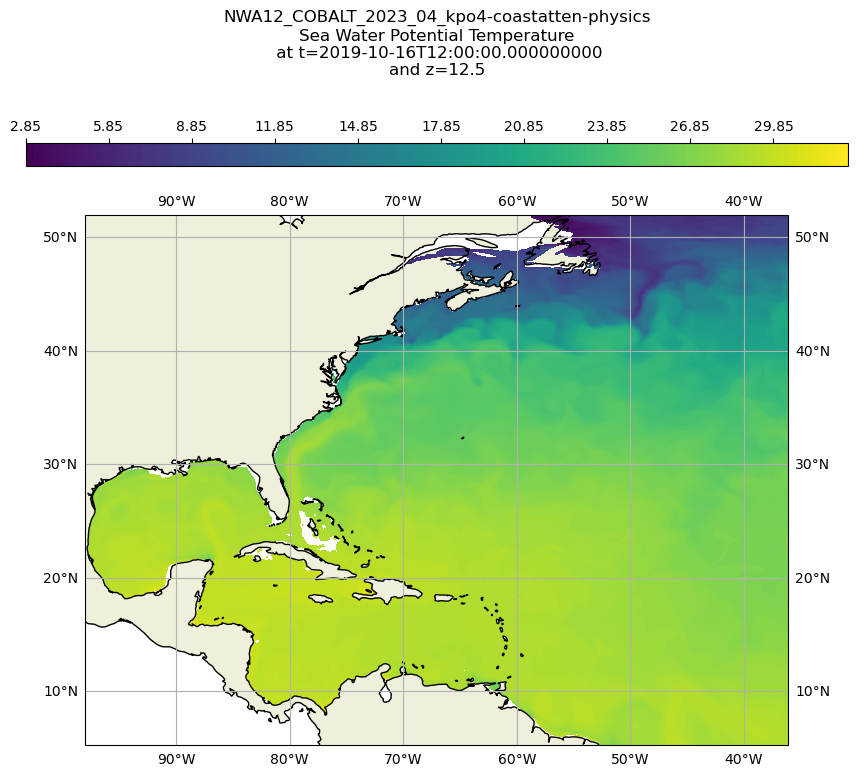

In [14]:
aspect = (xmax-xmin)/(ymax-ymin)
plt.figure(figsize=(8*aspect,8))
proj = ccrs.PlateCarree(central_longitude=180)
proj180 = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([xmin, xmax, ymin, ymax], crs=proj180)
# add some features to make the map a little more polished
ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.OCEAN)
ax.coastlines('50m')
gl = ax.gridlines(draw_labels=True)
ct = ax.contourf(ds['longitude'], ds['latitude'], slice, levels=255, transform=proj180)
plt.colorbar(ct, orientation='horizontal',pad=0.08, aspect=35, fraction=.06, location='top')
plt.title(str(ds.attrs['title']) + '\n' + str(slice.attrs['long_name']) + '\n at t=' + str(slice['time'].values) + '\nand z=' + str(slice['z_l'].values), y=1.25)
plt.show()